# Comparing Generation Profiles of Alberta Wind and Solar Assets

With significant growth in wind capacity in Alberta the last few years, and the commissioning of Alberta's first grid scale solar farm, I thought it would be interesting to compare the generation profiles of these assets. Not only how wind and solar compare, but how well correlated the inventory of wind assets are. Looking at metered volume data for each of the wind and solar farms since 2017, I compared the seasonal variation as well as variation by hour of day.

In [108]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from pandas import Grouper
from pandas import DataFrame
import os
import seaborn as sns
import numpy as np

# set format for plots from seaborn
sns.set(rc={'figure.figsize':(11, 4)})
sns.set_style("whitegrid")

### Downloading and conditioning the data from AESO

The Alberta Electric System Operator (AESO) provides relatively easy to download hourly metered volume data by generating asset. It takes a bit of conditioning as the data must be downloaded one month at a time, in the form of daily records. The python code I used to extract the individual wind and solar assets, and turn them into continuous time series can be found here: (insert github link). After conditioning the data, it can be read into a dataframe.

In [97]:
# read in conditioned time series files for each IPP 
# loads ARD1.csv first to set up dataframe, then joins rest of files

directory_in_str = "C:/Users/chris/OneDrive/Documents/Python/Alberta Power/AssetFiles"
directory = os.fsencode(directory_in_str)

abRenewables = pd.read_csv("C:/Users/chris/OneDrive/Documents/Python/Alberta Power/AssetFiles/ARD1.csv",
                           index_col = 'Date', parse_dates = True)
 
for file in os.listdir(directory):  
    filename = os.fsdecode(file)
    if filename.endswith(".csv") and filename != "ARD1.csv":
        pathstring = str(directory).strip('b').replace('\'','') + '/' + filename
        abRenewables = abRenewables.join(pd.read_csv(pathstring, index_col = 'Date', parse_dates = True))
        continue
    else:
        continue

# format date time index and calculate moving average

abRenewables.index = pd.to_datetime(abRenewables.index, format = '%B %d %Y %H')
abRenewablesMA30 = abRenewables.rolling(window=720).mean()

###  Wind is becoming a significant contributer to the grid in Alberta

Plotting the 30 day moving average generation for all the assests gives a good picture of the seasonal variablity. The biggest (and newest) three windfarms at the top of the graph are Blacksprings Ridge (300MW), Whitla (202MW), and Halkirik (150MW) respectively. These modern wind farms are much larger than many of Alberta's older wind farms. With the addition of these farms, Alberta has seen a large increase in wind capacity recently. Windy days can see 15% or more of Alberta's power generation come from wind. The potential for futher growth is enormous, but intermittancy will provide challenges as wind power's share of generation continues to grow.

The Brooks Solar Plant(15MW) is barely visible as the smoother greenline at the bottom. 

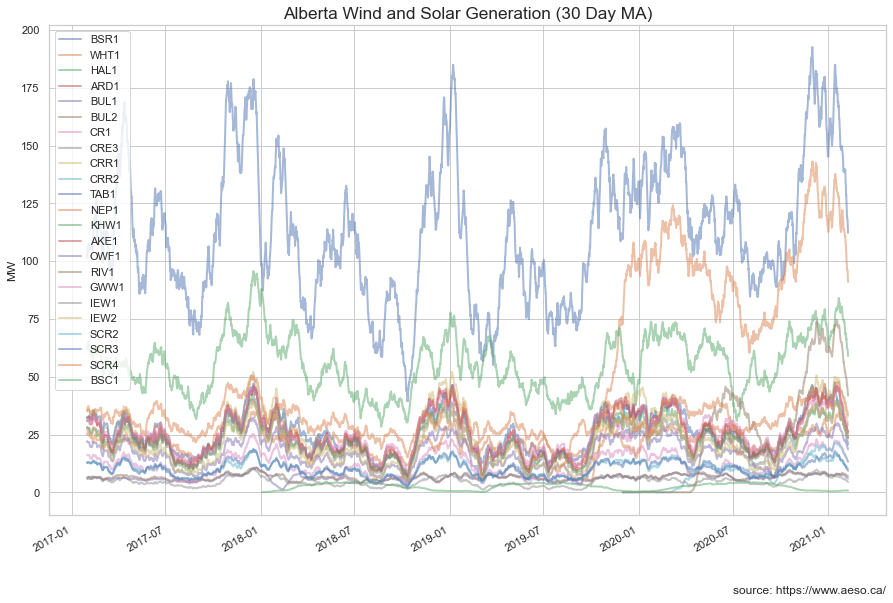

In [109]:
# plot all wind and solar 30 day moving average generation for Alberta

cols_plot = ['BSR1','WHT1','HAL1','ARD1','BUL1','BUL2', 'CR1','CRE3','CRR1','CRR2','TAB1',
 'NEP1','KHW1','AKE1','OWF1','RIV1','GWW1','IEW1','IEW2','SCR2','SCR3','SCR4','BSC1']
axes = abRenewablesMA30[cols_plot].plot(marker='None', alpha=0.5, linestyle='-',
                                        linewidth = '2', figsize=(15, 10), subplots= False)
plt.title('Alberta Wind and Solar Generation (30 Day MA)', y = 1, fontsize = 'x-large')
axes.set_ylabel('MW')
axes.set_xlabel('')
plt.figtext(0.90, 0.09, 'source: https://www.aeso.ca/', horizontalalignment='right', size = 'medium') 
plt.show()

### Brooks Solar (BSC1)


The facility at Brooks is currently Alberta's only grid scale solar farm. Here is a closer look at just the Brooks solar farm on a more appropriate scale. As you would expect, preformance is much best in the summer, and almost non-existant around the winter solstice.


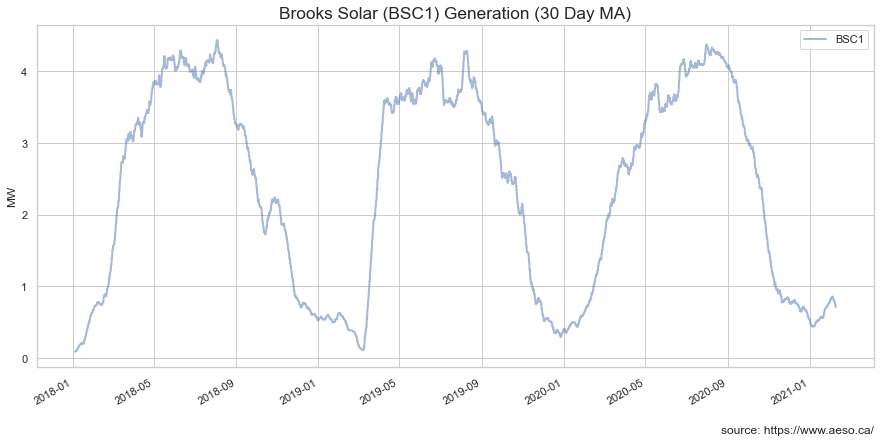

In [101]:
# plot 30 day moving average generation for Brooks Solar

cols_plot = ['BSC1']
axes = abRenewablesMA30[cols_plot].plot(marker='None', alpha=0.5, linestyle='-',
                                        linewidth = '2', figsize=(15, 7), subplots= False)
plt.title('Brooks Solar (BSC1) Generation (30 Day MA)', y = 1, fontsize = 'x-large')
axes.set_ylabel('MW')
axes.set_xlabel('')
plt.figtext(0.90, 0.07, 'source: https://www.aeso.ca/', horizontalalignment='right', size = 'medium') 
plt.show()

### Comparing capacity factors

In order to compare the performance of all these assets of different scale over time, it's helpful to look at capacity factors. Capacity factor is a measures the fraction of an assests maximum capacity they operate at over time. This is easy to calculate by dividing the generation values in the dataframe by the max capcity for each asset. These are listed below in the dictionary maxCapAssets.

In [39]:
# create dictionary with max generating capacities for assets
# in order to express generation in terms of capacity factors

assets = abRenewables.columns.tolist()
assets = sorted(assets)

# max capacities for each wind and solar farm from aeso

maxCap = [73,68,15,300,66,13,16,39,20,77,29,71,150,66,66,63,82,46,105,30,30,88,81,202]
maxCapAssets = dict(zip(assets, maxCap))
print(maxCapAssets)

{'AKE1': 73, 'ARD1': 68, 'BSC1': 15, 'BSR1': 300, 'BTR1': 66, 'BUL1': 13, 'BUL2': 16, 'CR1': 39, 'CRE3': 20, 'CRR1': 77, 'CRR2': 29, 'GWW1': 71, 'HAL1': 150, 'IEW1': 66, 'IEW2': 66, 'KHW1': 63, 'NEP1': 82, 'OWF1': 46, 'RIV1': 105, 'SCR2': 30, 'SCR3': 30, 'SCR4': 88, 'TAB1': 81, 'WHT1': 202}


In [40]:
# divide by maxCapAssests to calculate capacity factors 
# and generate 30 moving average

genCap = abRenewables.div(pd.Series(maxCapAssets))*100
genCapMA30 = genCap.rolling(window=720).mean()

### Seasonality of wind vs solar

Plotting capacity factors for the three biggest windfarms, along with the Brooks solar plant, it's easy to see how summer weighted solar generation compliments generaly lower wind generation, while wind does more heavy lifting in the winter. 

Also, it wasn't just your imagination - this winter was windier than normal! And 2020 as a whole was the windiest of the last 4 years I looked at.


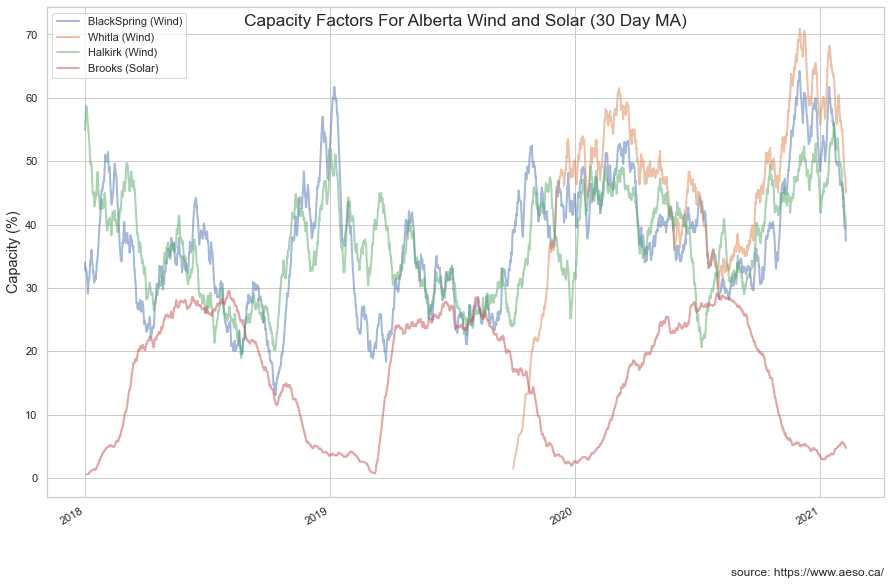

In [110]:
cols_plot = ['BSR1','WHT1','HAL1', 'BSC1']

name = ['BlackSpring (Wind)','Whitla (Wind)','Halkirk (Wind)','Brooks (Solar)']

axes = genCapMA30.loc['2018' : '2021',cols_plot].plot(marker='None', alpha=0.5,
                                linestyle='-', linewidth = '2',figsize=(15, 10), subplots= False)

plt.title('Capacity Factors For Alberta Wind and Solar (30 Day MA)', y = 0.95, fontsize = 'x-large')
axes.set_ylabel('Capacity (%)', size = 'large')
axes.set_xlabel('')
axes.legend(labels=name)
plt.figtext(0.90, 0.09, 'source: https://www.aeso.ca/', horizontalalignment='right', size = 'medium') 

axes.xaxis.set_major_locator(mdate.MonthLocator(1))
axes.xaxis.set_major_formatter(mdate.DateFormatter('%Y'));

### Hourly comparison of wind vs solar

The daily and hourly volatility of these assets makes the visualization difficult on longer time scales, which is why I've been using 30 day moving averages so far. However, in addition to seasonal variation, wind and solar both have distinct daily generating profiles as well. Looking at the average generation during each hour of the day over the past 4 years, we can compare typical generation for each asset throughout the day.

Again, solar seems to compliment wind generation with a mid-day peak nicely offsets a lull in mid-day wind power.

Also of note, the wind profiles hint at at least two distinct geographies.

In [42]:
# group by hour to see capacity factor variation by time of day (hour 0 is midnight to 1AM)
genCapHourly = genCap.groupby(genCap.index.hour).mean()

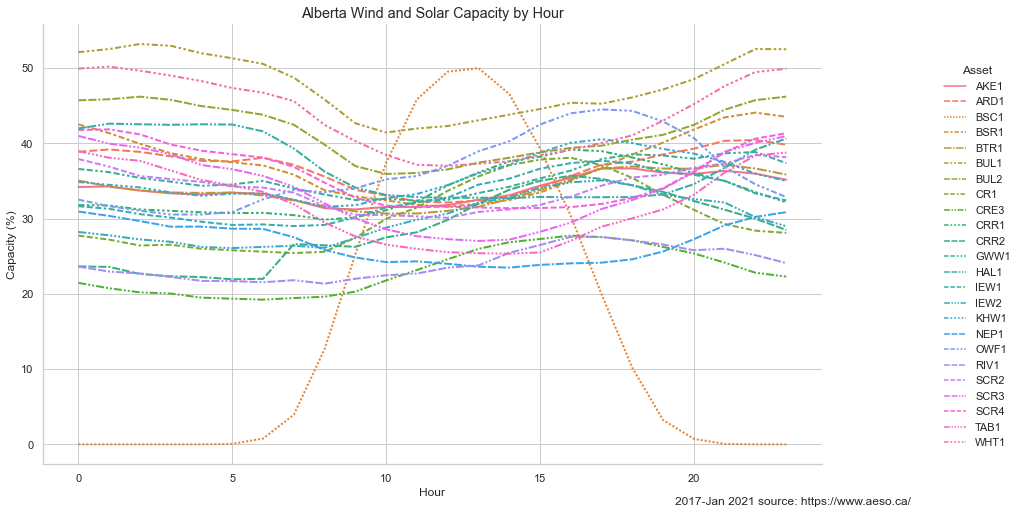

In [94]:
# plot generating capacity by hour of day for all wind and solar assets. 

g = sns.relplot(data=genCapHourly, kind = 'line', linewidth = '2')
g.set_axis_labels('Hour','Capacity (%)')
g.fig.set_size_inches(15,7)
g.legend.set_title('Asset')
plt.title('Alberta Wind and Solar Capacity by Hour', size = 'large')
plt.figtext(0.90, 0.01, '2017-Jan 2021 source: https://www.aeso.ca/', horizontalalignment='right', size = 'medium') 
plt.show()


## Brooks Solar vs Blacksprings Ridge, Whitla & Halkirk

This inverse correlation between wind and solar over the average day in Alberta is even more pronounced with the big three wind farms. 

This is important as they have the biggest impact on supply, and therefore market price. Also, much of the currently proposed new wind generation will be closer to these assets. This includes Capital Power's Whitla 2 (https://www.capitalpower.com/operations/whitla-wind-2/) and the Forty Mile project at Bow Island which will also be near Whitla (https://www.jwnenergy.com/article/2019/12/4/suncor-going-ahead-300mm-new-alberta-wind-farm/).


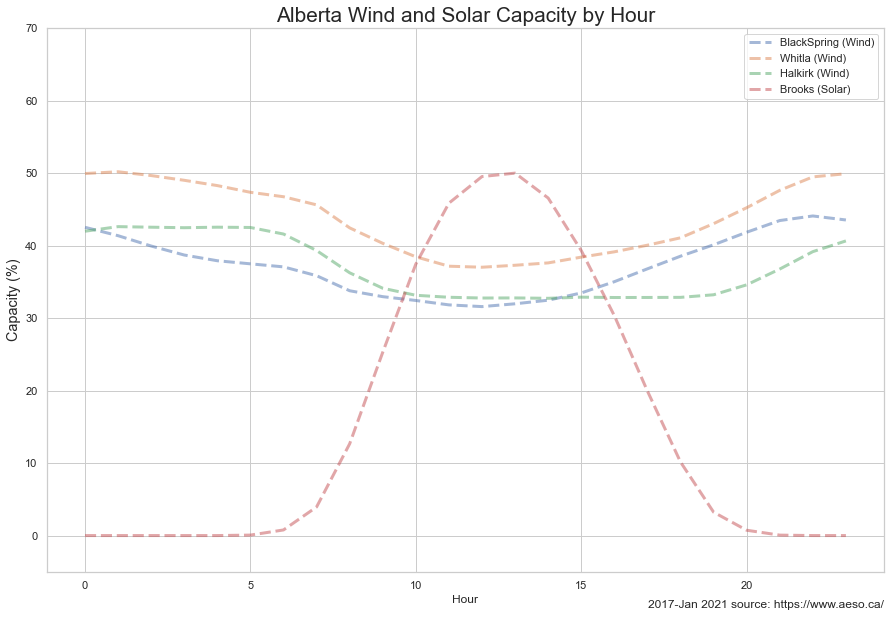

In [90]:
# plotting BSC1 (Brooks Solar) with the largest 3 wind farms.

ws = ['BSR1','WHT1','HAL1','BSC1']
name = ['BlackSpring (Wind)','Whitla (Wind)','Halkirk (Wind)','Brooks (Solar)']
axes = genCapHourly[ws].plot(marker='None', alpha=0.5, linestyle='--', linewidth = '3', 
                                  figsize=(15, 10), subplots= False)
plt.title('Alberta Wind and Solar Capacity by Hour', y = 1, fontsize = 'xx-large')
axes.set_ylabel('Capacity (%)', size = 'large')
axes.set_xlabel('Hour')
axes.set_ylim(-5,70)
axes.legend(labels=name)
plt.figtext(0.90, 0.075, '2017-Jan 2021 source: https://www.aeso.ca/', 
            horizontalalignment='right', size = 'medium') 
plt.show()

## Correlation of renewable generating assests

We've seen how solar and wind in Alberta can compliment each other to help reduce intermittancy, and therefore the need for storage or other generation in a future that relies more heavily on renewables. But could more strategic placement of new wind assets also help? Previously, the goverments Renewable Energy Program (REP) has incentivized generators to go for maximum generation. For purposes of reducing intermittancy however, there is value in targeting locations with lower correlation to existing renewable generators. 

Let's take a more quantitative look at how well these generators are correlated to each other. Building a correlation matrix and then averaging the values for each asset will tell us how correlated each assets output is to the rest.

In [31]:
# calculate a correlation matrix for all wind and solar assets from January 2020 to Feb 2021.
abRenewables2020 = abRenewables[abRenewables.index.year >= 2020]

# calculate mean correlation for each asset
abRenewables2020Corr = abRenewables2020.corr().mean().sort_values(ascending = False)

## Capture price

In discussion with Blake Shaffer on twitter, he shared how he had been looking at 'capture price' as a measure of how renewable generators were contributing to the grid at times of higher need. He pointed out that the generators he identified with higher capture prices seemed to match well with generators that I had determined had low correlation values.

Downloading AESO's hourly power price data, it's possible look at how capture price varies as a function of how well correlated a given generator is to the rest. Loading that data in, we can calculate the revenue each generator made since Jan 2020, and divide by the total generation to determine the average capture price.

In [32]:
# load in Alberta pool price data

ABpower = pd.read_csv("PoolPricesAll.csv", index_col = 'Date', parse_dates = True)
ABpower.index = pd.to_datetime(ABpower.index, format = '%m/%d/%Y %H')
ABpower2020 = ABpower[ABpower.index.year >= 2020]

#Drop last day to match index to generation data
ABpower2020.drop(ABpower2020.tail(24).index)

,Price,30Ravg,Demand
Date,,,
2020-01-01 00:00:00,30.24,43.49,9467
2020-01-01 01:00:00,29.43,43.49,9361
2020-01-01 02:00:00,29.66,43.49,9286
2020-01-01 03:00:00,28.19,43.49,9209
2020-01-01 04:00:00,31.17,43.49,9195
...,...,...,...
2021-02-07 19:00:00,585.98,85.22,11271
2021-02-07 20:00:00,333.65,85.64,11127
2021-02-07 21:00:00,60.26,85.67,11093


In [52]:
# extract hourly prices as series and multiply by metered volumes in abRenewables
# for hourly revenue
pricesHourly = (ABpower2020['Price']) 
hourlyRev = abRenewables2020.mul(pricesHourly, axis = 0)

# divide by the total metered volumes for the period to for
# average capture price
aveCapPrice = hourlyRev.sum().div(abRenewables2020.sum())

In [53]:
# new data frame with average capture prices and correlation averages 
# for each asset

t = pd.concat([aveCapPrice, abRenewables2020Corr], axis=1)
t.columns = ['Capture Price', 'Corr']                        #rename columns

t = t.sort_values('Corr')    #sort dataframe by correlation
w = t[t.index != 'BSC1']     #split into two data sets (wind, solar)
s = t[t.index == 'BSC1']


## Correlation and capture price

In the two charts below, we can see that the less correlated assets saw a higher capture price over the period. Remarkably, Brooks solar (which is negatively correlated to wind) captured prices $10-15/MWh higher than the wind generators. 


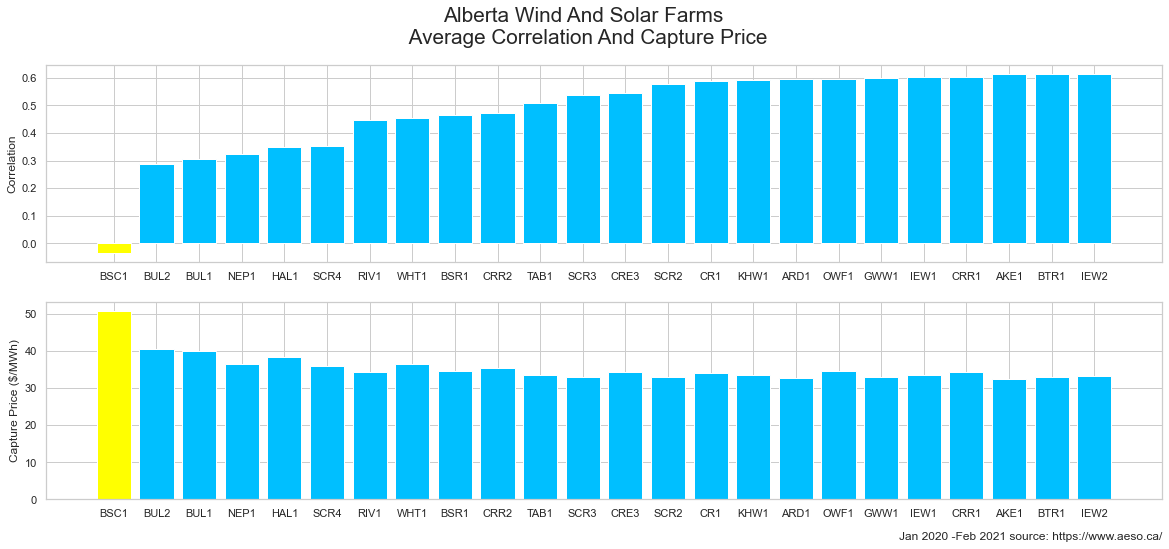

In [95]:

colors1 = ['yellow'] + ['deepskyblue']*23

plt.figure(figsize=(20, 8))
plt.suptitle('Alberta Wind And Solar Farms \n Average Correlation And Capture Price',size = 'xx-large')
plt.title('Alberta Wind And Solar Farms', loc = 'left')
plt.subplot(211)
plt.bar(t.index,'Corr',data = t,  color = colors1)
plt.ylabel('Correlation')

plt.subplot(212)

plt.bar(t.index,'Capture Price',data = t, color = colors1)
plt.ylabel('Capture Price ($/MWh)')
plt.figtext(0.90, 0.055, 'Jan 2020 -Feb 2021 source: https://www.aeso.ca/', 
            horizontalalignment='right', size = 'medium') 
plt.show()



## Differing geographies

Plotting capture price vs correlation gives us an even better look at the realtionship between the two. Here we see some clustering as the result of two differenet geographies. The majority of Alberta's wind farms are located along Highway 3 from Pincher Creek to Medicine Hat. The assets clustered around a correlation of ~ 0.3 are located in a band that stretchs from Red Deer to the Saskatchewan border south of Wainright. 

Whitla currently has the highest capacity factor (48% in 2020) of any wind farm Alberta, so it is understandable that there are more projects planned nearby. Looking this plot however, it is clear that more generation near Halkirk and Chuavin (BUL1 & BUL2) would provide more power to the grid at times of higher price (Furthermore, Whitla's turbines are the most modern, and with a hub height of 134m are the largest in the province - so perhaps similar technology at Halkirk will yeild similar capaity factors).

Of course significant increase in generation in the more northernly region could quickly erode this price advantage, and even eventually reverse it. Finding additional sites poorly correlated to these regions would help reduce intermittancy furhter.

In 2017 Blake Schaffer pointed out how the existing REP failed to recognize the additional value that solar would add compared to additional wind generation. He provides great analysis here:
https://www.cansia.ca/uploads/7/2/5/1/72513707/20171116_cansia_represearch_submitted__002_.pdf

As the share of power from wind and solar feeding into our grid grows, finding ways to reduce intermittancy will become more important. Increasing the share of solar, as well as diversifying the location of new wind assets could be part of the solution.

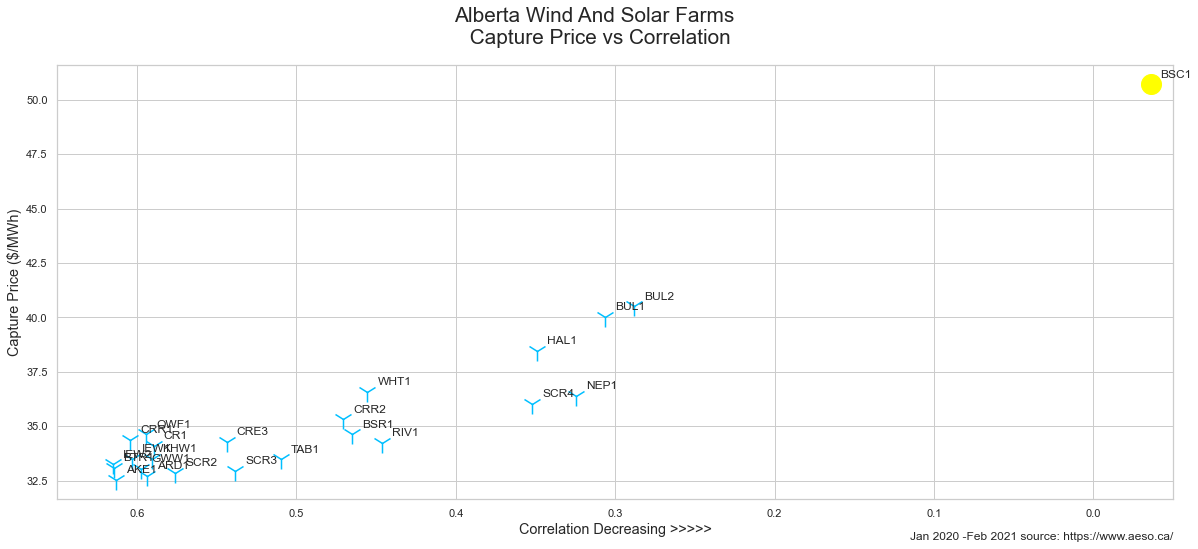

In [89]:

sns.set_style("whitegrid")
# plot average capture price against 
plt.figure(figsize=(20, 8))

plt.scatter(s['Corr'],s['Capture Price'], s = 400, color = 'yellow', marker ='o')
plt.scatter(w['Corr'],w['Capture Price'], s = 400, color = 'deepskyblue', marker = '1', )

plt.xlim(0.65,-0.05)
labelsW = w.index
labelsS = s.index

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(w['Corr'],w['Capture Price'], labelsW):
    plt.annotate(label,             
                xy=(x_pos, y_pos), 
                xytext=(10, 10),    
                textcoords='offset points', 
                ha='left',         
                va='center')       

for x_pos, y_pos, label in zip(s['Corr'],s['Capture Price'], labelsS):
    plt.annotate(label,             
                xy=(x_pos, y_pos),
                xytext=(10, 10),    
                textcoords='offset points', 
                ha='left',         
                va='center')       
    
plt.ylabel('Capture Price ($/MWh)', size = 'large')
plt.xlabel('Correlation Decreasing >>>>>', size = 'large')

plt.suptitle('Alberta Wind And Solar Farms \n Capture Price vs Correlation',size = 'xx-large')
plt.figtext(0.90, 0.055, 'Jan 2020 -Feb 2021 source: https://www.aeso.ca/', horizontalalignment='right', size = 'medium') 
plt.show()